**ABOUT THE DATASET**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

**FEATURES**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Importing basic libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Checking number of duplicate values
df.duplicated().sum()

np.int64(0)

In [5]:
# Counting null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Checking ievery value of every column
for i in df.columns:
  print('********************************',i,'*********************************')
  print()
  print(set(df[i].tolist()))
  print()

******************************** Pregnancies *********************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

******************************** Glucose *********************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

******************************** BloodPressure *********************************

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60,

The features- Glucose, BloodPressure, SkinThickness, Insulin, BMI showing values as 0 is biologically not possible as no one can have such values as 0.

Therefore, using mean to substitute that value in place of 0.

In [8]:
int(df['Glucose'].mean())

120

In [9]:
df['Glucose']=df['Glucose'].apply(lambda x:'120' if x==0 else x)

In [10]:
int(df['BloodPressure'].mean())

69

In [11]:
df['BloodPressure']=df['BloodPressure'].apply(lambda x:'69' if x==0 else x)

In [12]:
int(df['SkinThickness'].mean())

20

In [13]:
df['SkinThickness']=df['SkinThickness'].apply(lambda x:'20' if x==0 else x)

In [14]:
int(df['Insulin'].mean())

79

In [15]:
df['Insulin']=df['Insulin'].apply(lambda x:'79' if x==0 else x)

In [16]:
int(df['BMI'].mean())

31

In [17]:
df['BMI']=df['BMI'].apply(lambda x:'31' if x==0 else x)

In [18]:
for i in df.columns:
  print('********************************',i,'*********************************')
  print()
  print(set(df[i].tolist()))
  print()

******************************** Pregnancies *********************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

******************************** Glucose *********************************

{44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, '120', 141, 142, 143, 144, 145, 146, 147, 148, 140, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 149}

******************************** BloodPressure *********************************

{24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60

# Using Boxplots to see outliers

Outliers in Healthcare datasets are not to be treated as they tell whether the patient is having diabetes or not.

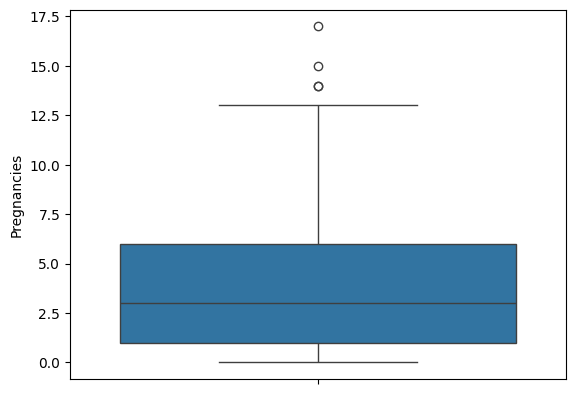

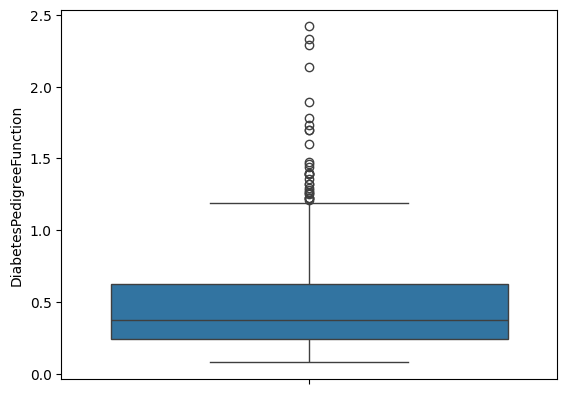

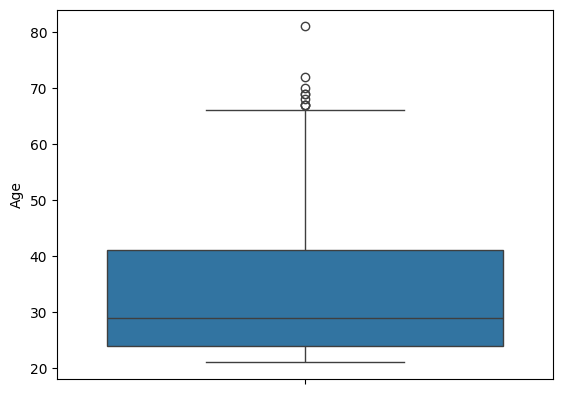

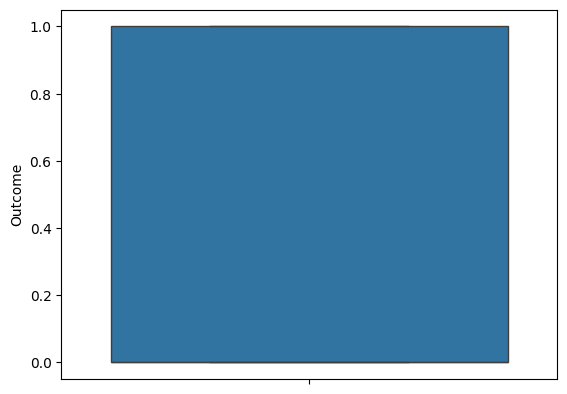

In [19]:
def boxplots(i):
  sns.boxplot(df[i])
  plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns):
  boxplots(i)

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    object 
 2   BloodPressure             768 non-null    object 
 3   SkinThickness             768 non-null    object 
 4   Insulin                   768 non-null    object 
 5   BMI                       768 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


In [22]:
# Step 1: Identify object-type columns
object_cols = df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# Step 2: Convert them to numeric
df[object_cols] = df[object_cols].apply(pd.to_numeric, errors='coerce')

Object columns: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.436589,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.877335,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df['Outcome'].value_counts(normalize=True)*100

,proportion
Outcome,
0,65.104167
1,34.895833


Outcome is a balanced dataset

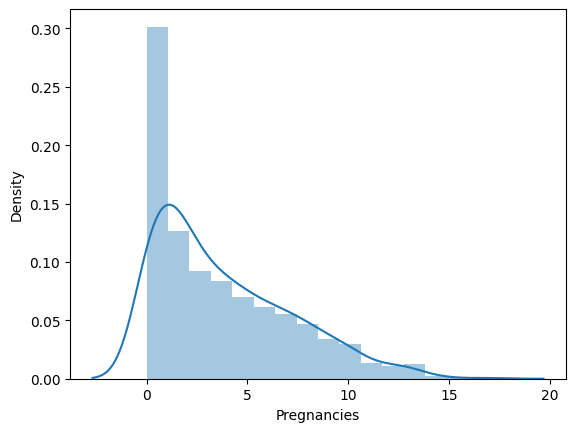

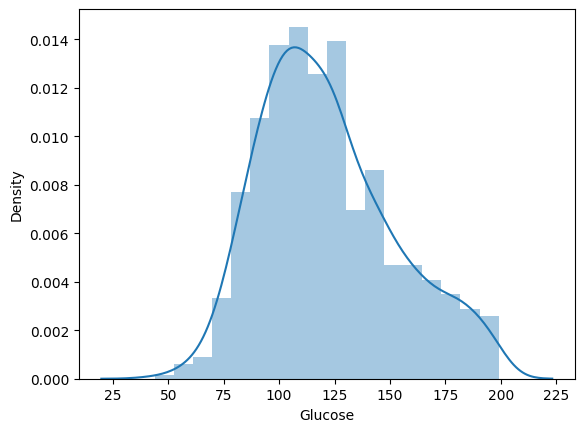

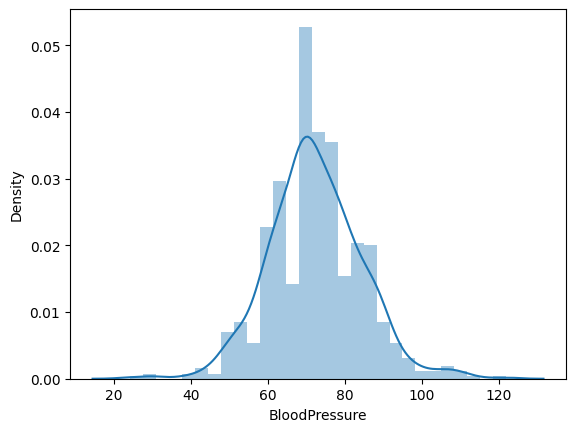

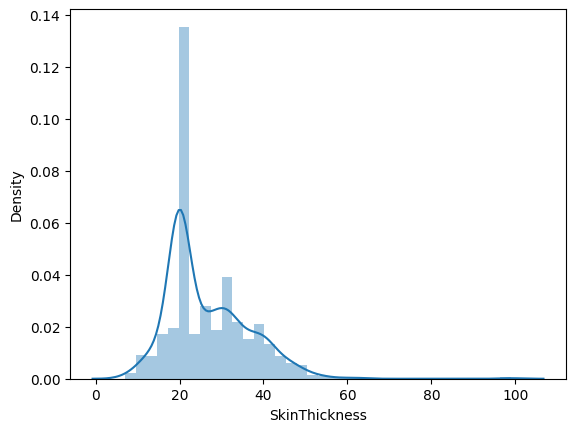

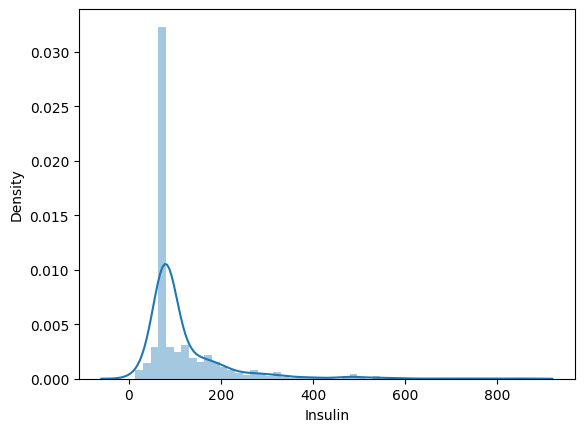

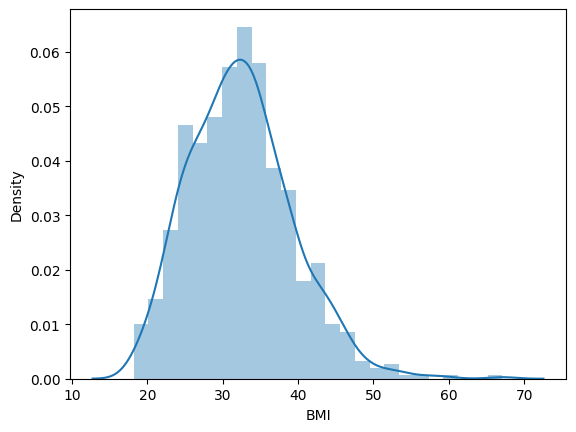

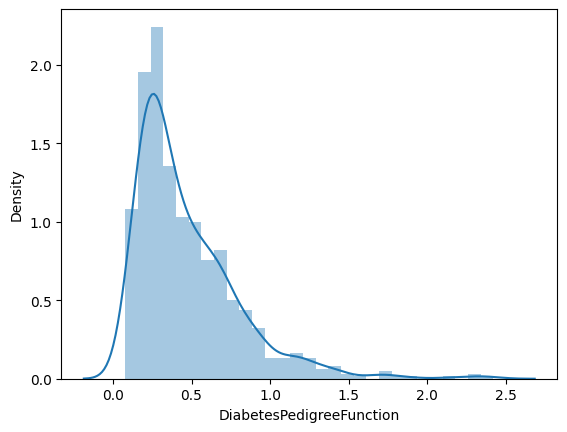

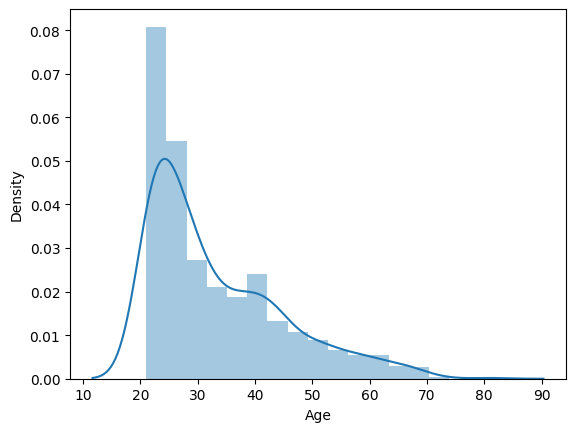

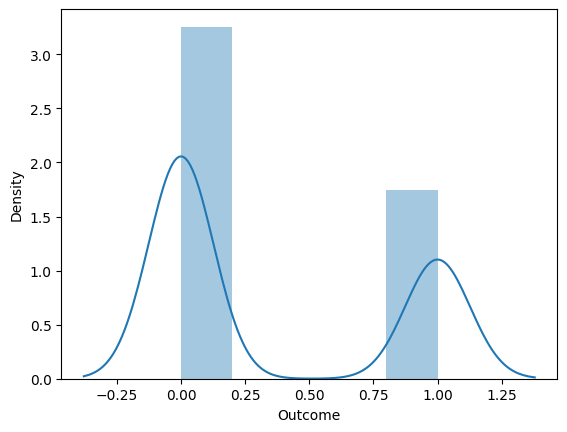

In [25]:
def distplot(cols):
    sns.distplot(df[cols])
    plt.show()

for cols in df.columns:
  distplot(cols)

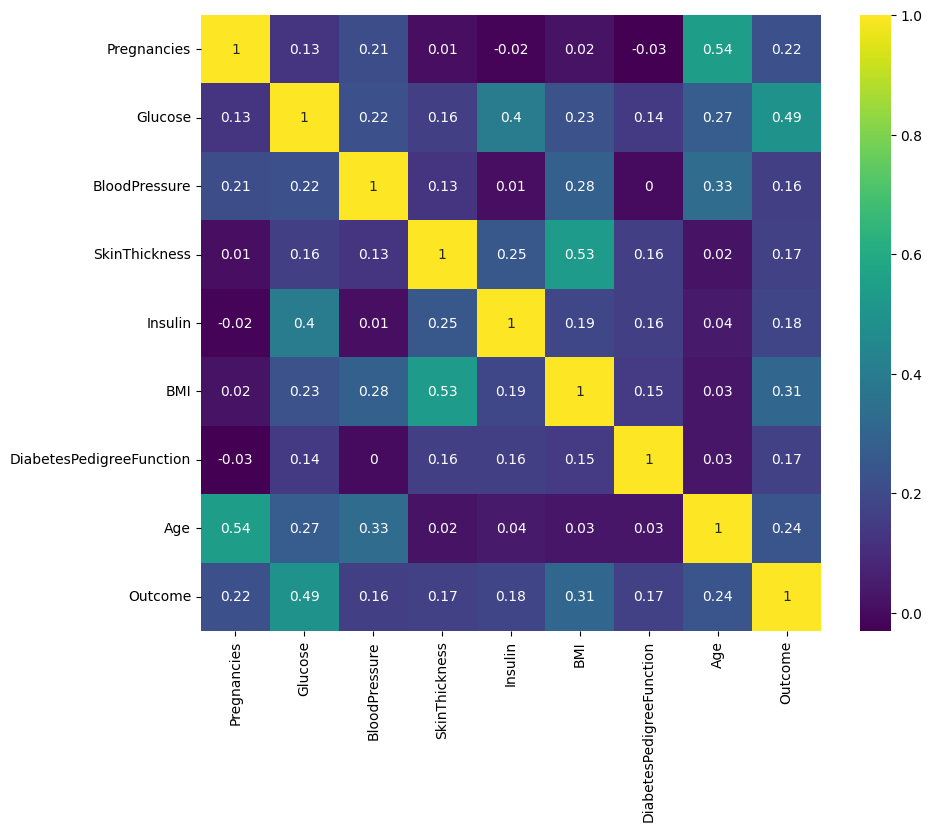

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis')
plt.show()

# EDA

In [27]:
!pip install dtale

In [43]:
import dtale
d = dtale.show(df)
d

http://eede22956ce6:40000/dtale/main/4

# Splitting into Dependent and Independent variable

In [29]:
x=df.iloc[:,0:8]
y=df['Outcome']

In [30]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,79,33.6,0.627,50
1,1,85,66,29,79,26.6,0.351,31
2,8,183,64,20,79,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [31]:
x.shape

(768, 8)

In [32]:
y.shape

(768,)

# Building a Model


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42 , stratify=y)

In [34]:
pd.DataFrame(y_train).value_counts()

,count
Outcome,
0,400
1,214


In [35]:
pd.DataFrame(y_test).value_counts()

,count
Outcome,
0,100
1,54


Both y_train and y_test are balanced dataset

# Importing Models and metrics

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Comparing accuracy of each model with graphs

                   Method  Accuracy
0       LogisticReression  0.727273
1  DecisionTreeClassifier  0.675325
2  RandomForestClassifier  0.720779
3                     SVC  0.720779
4    KNeighborsClassifier  0.694805
5           XGBClassifier  0.753247
6              GaussianNB  0.701299
7        VotingClassifier  0.733766
Axes(0.125,0.11;0.775x0.77)


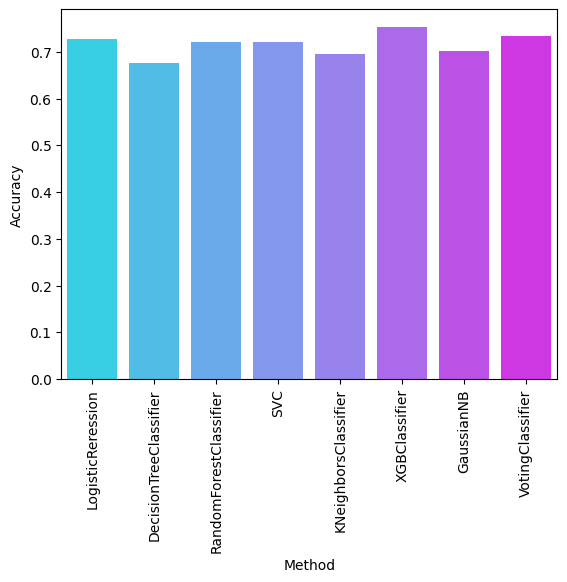

In [37]:
logit=LogisticRegression()
logit=logit.fit(x_train,y_train)
y_pred_logit=logit.predict(x_test)
accuracy_logit=accuracy_score(y_test,y_pred_logit)

dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train,y_train)
y_pred_dtree=dtree.predict(x_test)
accuracy_dtree=accuracy_score(y_test,y_pred_dtree)

rfc=RandomForestClassifier()
rfc=rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
accuracy_rfc=accuracy_score(y_test,y_pred_rfc)

svc=SVC()
svc=svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
accuracy_svc=accuracy_score(y_test,y_pred_svc)

knc=KNeighborsClassifier()
knc=knc.fit(x_train,y_train)
y_pred_knc=knc.predict(x_test)
accuracy_knc=accuracy_score(y_test,y_pred_knc)

xgboost = XGBClassifier(max_depth=2,
learning_rate=0.1,
subsample=0.8,
colsample_bytree=0.9,
random_state=42)
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

gnb=GaussianNB()
gnb=gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
accuracy_gnb=accuracy_score(y_test,y_pred_gnb)

vote=VotingClassifier(estimators=[('logit',logit),('dtree',dtree),('rfc',rfc),('svc',svc),('knc',knc),('xgboost',xgboost),('gnb',gnb)])
vote=vote.fit(x_train,y_train)
y_pred_vote=vote.predict(x_test)
accuracy_vote=accuracy_score(y_test,y_pred_vote)

list1=['LogisticReression','DecisionTreeClassifier','RandomForestClassifier','SVC','KNeighborsClassifier','XGBClassifier','GaussianNB','VotingClassifier']
list2=[accuracy_logit,accuracy_dtree,accuracy_rfc,accuracy_svc,accuracy_knc,accuracy_xg,accuracy_gnb,accuracy_vote]
list3=[logit,dtree,rfc,svc,knc,xgboost,gnb,vote]

df_accuracy=pd.DataFrame({'Method':list1 , 'Accuracy':list2})
print(df_accuracy)

unique_colors = sns.color_palette("cool", len(df_accuracy))

chart = sns.barplot(x="Method", y="Accuracy", data=df_accuracy,palette=unique_colors)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# **XGBoost is working better than other models**

**Finding Training Accuracy and Testing Accuracy**

In [38]:
y_pred_xg_train = xgboost.predict(x_train)
y_pred_xg_test = xgboost.predict(x_test)
accuracy_xg_train = accuracy_score(y_train, y_pred_xg_train)
accuracy_xg_test = accuracy_score(y_test, y_pred_xg_test)

print("************************")
print("Training Accuracy :",accuracy_xg_train)
print("************************")
print("Test Accuracy :",accuracy_xg_test)

************************
Training Accuracy : 0.8469055374592834
************************
Test Accuracy : 0.7532467532467533


# **Using Cross-Validation**

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgboost, x, y, cv=cv)
print("Stratified CV Accuracy:", scores.mean())

Stratified CV Accuracy: 0.7655547067311773


The accuracy got improved

# **Checking classification report and confusion matrix**


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_xg_test))
print(confusion_matrix(y_test, y_pred_xg_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

[[85 15]
 [23 31]]


In [47]:
df_accuracy.to_csv("Diabetes_Accuracy.csv", index=False)

In [45]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.9 MB/s eta 0:00:00


2025-11-01 06:10:13.485 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-01 06:10:13.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

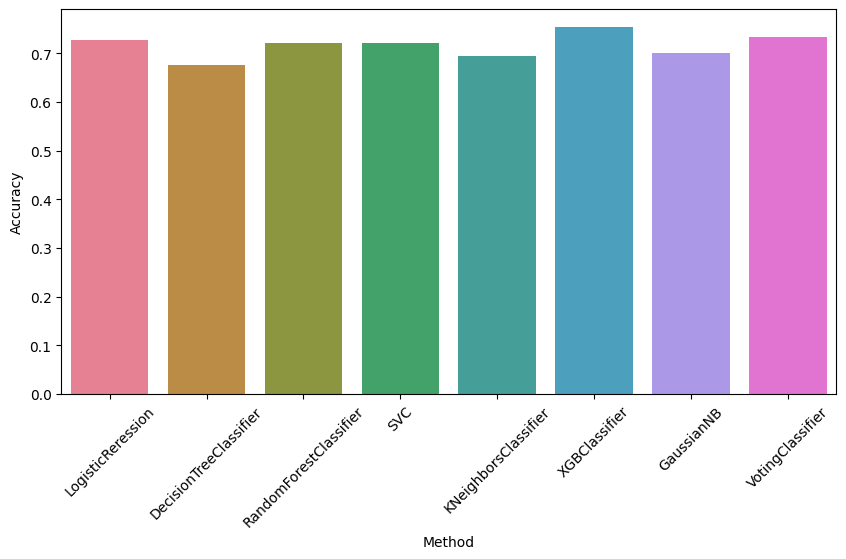

In [49]:
import streamlit as st

# Title
st.title("Diabetes Prediction")

# Loading results
df_accuracy = pd.read_csv("Diabetes_Accuracy.csv")

# Showing raw data
st.subheader("Model Performance Metrics")
st.dataframe(df_accuracy)

# Barplot of R² Scores
st.subheader("R² Score Comparison")
fig, ax = plt.subplots(figsize=(10, 5))
colors = sns.color_palette("husl", len(df_accuracy))
sns.barplot(x="Method", y="Accuracy", data=df_accuracy, palette=colors, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
st.pyplot(fig)

# dropdown to select model and show details
model_details = df_accuracy[df_accuracy["Method"] == xgboost]
st.write(model_details)

In [51]:
from joblib import dump , load
dump(xgboost, 'xgboost.joblib')
xgb= load('xgboost.joblib')

In [52]:
!pip freeze > requirements.txt